# <u>The Movie Database Project<u/>
###### - By Otis Benbow
## <u>Agenda<u/>

* Quick Overview of the dataset features
* Discuss the time frame of this dataset
* Delve into the top 100 most popular movies:
    * To look at the genres
    * And to see something interesting in regards to language
* Analyse which movies made the biggest losses

## <u>Python Modules:<u>

In [2]:
import numpy as np                       # The fundamental python package
import pandas as pd                      # Used for cleaning, exploring, manipulating, and analysing the dataset
import matplotlib.pyplot as plt          # The main plotting library for visualisations
import seaborn as sns                    # Seaborn helps make statistical graphics. Works closely with matplotlib and pandas
import ast                               # Used to help interpret the names of entries within columns as a list

## <u>Importing The Dataset:<u>

In [3]:
tmdb_movies = "TMDB_movies.csv"
df = pd.read_csv(tmdb_movies)

In [4]:
# Create a copy of the dataframe to compare back to when making any changes
df_copy = df.copy()

## <u>Features of the Dataset:<u>
* **Budget** - Budget (US\$)
* **Genres** - List of Genres
* **Homepage** - Webpage URL
* **ID** - Unique Film ID
* **Keywords** - List of Keywords Describing the Movie
* **Original Language** - Language Film was Made in
* **Original Title** - Title of the On-screen Movie in it's Original Language
* **Overview** - A Brief Description of the Movie
* **Popularity** - Popularity Based on a Number of [TMDB Attributes](https://developer.themoviedb.org/docs/popularity-and-trending)
* **Production Companies** - List of Production Companies
* **Production Countries** - List of Production Countries
* **Release Date** - Year/Month/Day of Movie Release
* **Revenue** - Revenue (US\$)
* **Runtime** - Movie Length (Minutes)
* **Spoken Languages** - List of Languages Spoken in the Movie
* **Status** - Release Status of the Movie
* **Tagline** - Movie Tagline
* **Title** - US Release Title of the Movie
* **Vote Average** - Average TMDB Review Rating
* **Vote Count** - Number of TMDB Reviews

## <u>Data Cleaning<u>
[Click Here to jump to info on my data cleaning](#data-cleaning-info)

<a id="start-of-analysis"></a>
## <u>What is the Time Frame of the Dataset?<u>

Let's check this while also visualising the number of movies by release date using a distribution plot:

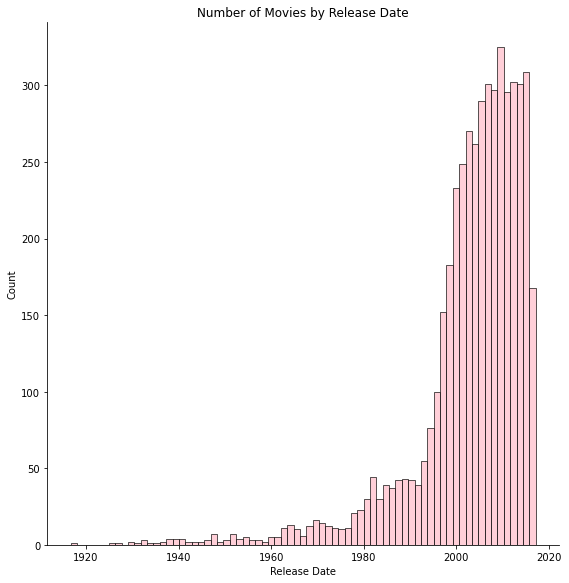

In [14]:
sns.displot(data = df['release_date'], height = 8, color = 'pink')

plt.title('Number of Movies by Release Date') # Name for the plot

plt.xlabel('Release Date') # Formatting the X-axis

plt.show()

The most recently released movie is titled *"Growing Up Smith"*, released on the **3rd of February, 2017** <br/>
Meaning that the dataframe only has data up to 2017 <br/>
While the oldest movie is titled *"Intolerance"*, released on the **4th of September, 1916** <br/>

## <u> The Top 100 Most Popular Movies:<u>

Found using the TMDB Popularity Score

In [15]:
df_top_100 = df.sort_values(by = 'popularity', ascending = False).head(100).copy() # Get only the top 100 most popular movies

exploded_genres = df_top_100.explode('extracted_genres') # Separate every genre of each top 100 most popular movie into it's own row

genre_counts = exploded_genres.groupby('extracted_genres')[['id']].count().sort_values(by = 'id', ascending = False).reset_index() # Get the counts of every genre appearing in the top 100

## <u>What are the Most Popular Genres?<u>

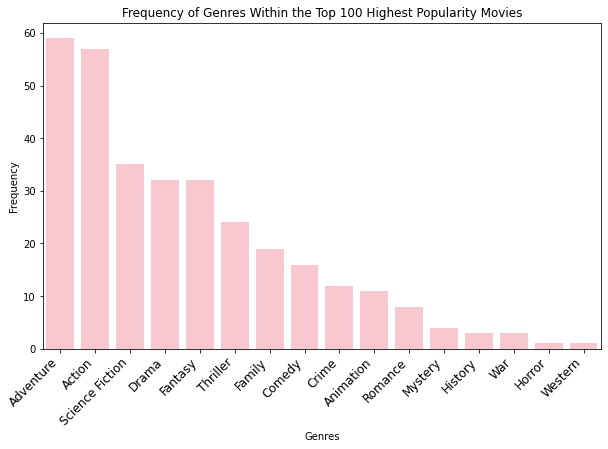

In [17]:
# Plot a bar chart using Seaborn for the most frequently appearing genres in the top 100 most popular movies
plt.figure(figsize=(10, 6))

sns.barplot(data = genre_counts, x = 'extracted_genres', y = 'id', color = 'pink') # Construct the bar plot

plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Frequency of Genres Within the Top 100 Highest Popularity Movies') # Give the plot a title
plt.xlabel('Genres') # change the x-axis title
plt.ylabel('Frequency') # change the y-axis title

plt.show()

As you can see, in the top 100 movies, **Adventure** is the most popular genre with 59 entries<br/>
Followed closely by **Action** with 57 entries <br/>
<br/>
While **Horror** and **Western** are tied with just a single entry <br/>
These movies are *It Follows* and *The Revenant* respectively <br/>

## <u>Taking adventure movies, what are the most frequently appearing genres alongside them?<u>

In [18]:
# Find every genre in a film that also contains the genre 'adventure'
adv = exploded_genres[exploded_genres['extracted_genres'] == 'Adventure']  # Taking just the Adventure movies

adv_movies = adv['title']  # Finding the title of each adventure movie

adv_genres = df[df['title'].isin(adv_movies)]  # Finding all genres for movies that are adventures

exploded_adv_genres = adv_genres.explode('extracted_genres')  # Extracting just those genres

adv_genre_counts = exploded_adv_genres.groupby('extracted_genres')[['id']].count().sort_values(by = 'id', ascending = False).reset_index()  # Finding the count of each genre

adv_genre_counts.drop(adv_genre_counts[adv_genre_counts['extracted_genres'] == 'Adventure'].index, inplace=True)  # Removing the adventure genre from the list
adv_genre_counts.rename(columns = {'extracted_genres': 'Genres', 'id': 'Count'}, inplace = True)  # Formatting the column names

adv_genre_counts

,Genres,Count
1,Action,41
2,Fantasy,29
3,Science Fiction,24
4,Family,14
5,Thriller,10
6,Comedy,9
7,Drama,8
8,Animation,7
9,Romance,4
10,Crime,2


In the top 100: <br/>
**Action** and **Adventure** is the most popular multi-genre movie type!

## <u>How do these findings compare to the rest of the dataset?<u/>

In [19]:
exploded_genres_df = df.explode('extracted_genres') # Separate every genre of each film into it's own row

genre_counts_df = exploded_genres_df.groupby('extracted_genres')[['id']].count().sort_values(by = 'id', ascending = False).reset_index() # Get the counts of every genre appearing in the dataset

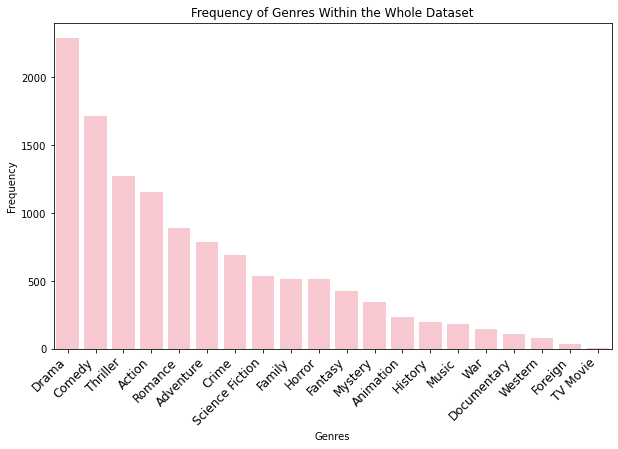

In [20]:
# Plot a bar chart using Seaborn for the most frequently appearing genres in the whole dataset
plt.figure(figsize=(10, 6))

sns.barplot(data = genre_counts_df, x = 'extracted_genres', y = 'id', color = 'pink') # Construct the bar plot

plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )

plt.title('Frequency of Genres Within the Whole Dataset') # Give the plot a title
plt.xlabel('Genres') # change the x-axis title
plt.ylabel('Frequency') # change the y-axis title

plt.show()

**Adventure** is actually the **6th** most common genre! <br/>
And **Action** is the **4th** most common genre! <br/>
<br/>
As you can see: <br/>
**Drama** is actually the most common genre with 2289 movies<br/>
<br/>
So, while dramas are the most frequently being made, it doesn't mean that they are going to be the most popular

## <u>What Are the Original Languages of the Top 100 Most Popular Movies?<u>

Every entry into the top 100 films have an original language of **English**
```Python
df_top_100.groupby('original_language')['id'].count()
```
### Except One!
<u>Spirited Away</u>
With an original language of **Japanese**

In [21]:
# Show the results of Spirited Away
df_copy[df_copy['title'] == 'Spirited Away']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2294,15000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://movies.disney.com/spirited-away,129,"[{""id"": 616, ""name"": ""witch""}, {""id"": 970, ""na...",ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,"[{""name"": ""Studio Ghibli"", ""id"": 10342}]","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2001-07-20,274925095,125.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840


<img src = "https://upload.wikimedia.org/wikipedia/commons/5/5d/Spirited_Away_logo.png?20110312134108" width = 600>

## <u>How does **Spirited Away** compare to other films with a Japanese original language?<u>

#### Key Insights:
- There are **15 total Japanese films** in the database.
- **4 of these are produced by Studio Ghibli**, (the producer of *Spirited Away*):
  - **Howl's Moving Castle**
  - **Ponyo**
  - **Princess Mononoke**
  - **Spirited Away**

#### Popularity:
- These four Studio Ghibli films rank **in the top 5 most popular** Japanese-language films.
- The most popular non-Studio Ghibli movie is **Seven Samurai**.

#### Financial Performance:
- Despite its popularity, **Seven Samurai** lost **1.7 million USD**.
- In contrast, each Studio Ghibli film made between **145–260 million USD**.

#### Conclusion:
Studio Ghibli consistently produces beautiful Japanese-language films that are not only popular but also highly profitable, demonstrating their global appeal.

## <u>Which Movies made the Biggest Losses?<u>

Firstly, to calculate the movies with the biggest losses: <br/>
A new column is created called *profit*
```Python
df['profit'] = df['revenue'] - df['budget']
```
Note that this is technically not profit, since the budget is only a projected cost. However, for our intentions, is valid

In [22]:
# Create a mask where budget is greater than revenue (Making a loss) and sort by profit (biggest loss first)
big_loss = df[df['budget'] > df['revenue']].sort_values(by = ('profit'))
top_50_loss = big_loss.head(50) # Include only the top 50 losses

The top 5 Biggest losses are:
- **The Lone Ranger** = 165 Million USD
- **The Wolfman** = 150  Million USD
- **The Alamo** = 119 Million USD
- **Mars Needs Moms** = 111 Million USD
- **Dragonball Evolution** = 100 Million USD

To see one reason why these movies are such big losses <br/>
We can compare it to movie popularity score:

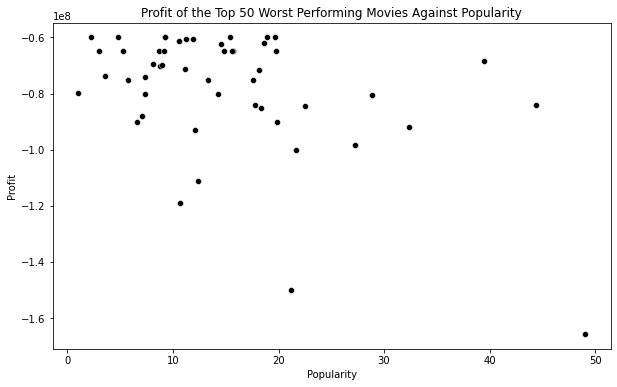

In [23]:
# Plot a scatter plot from seaborn to plot popularity against profit
plt.figure(figsize=(10, 6))

sns.scatterplot(data = top_50_loss, x = 'popularity', y = 'profit', color = 'black') # Construct the scatter plot

plt.title('Profit of the Top 50 Worst Performing Movies Against Popularity') # change the plot title
plt.xlabel('Popularity') # change the x-axis title
plt.ylabel('Profit') # change the y-axis title

plt.show()

As you can see:
- Most films that make a substantial profit loss are **not** very popular
- With none of them having a popularity score of more than 50 <br/>

Showing that it is likely that they are making such **big losses because they are not very popular!** <br/>
<br/>
#### Interesting Note:
The most popular movie is actually the biggest loss! <br/>
**The Lone Ranger** <br/>
Perhaps there is something to be said about a movie being so badly performing that it becomes a classic again

## <u>Can we see anything interesting when looking at the dates of the top 50 biggest losses?<u/>
We **can** see something interesting! <br/>
all of the films are from after **1995!** <br/>
Except One!
<u>Metropolis</u> released in **1927**

In [22]:
# Show every film before 1995
top_50_loss[top_50_loss['year'] < 1995]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,extracted_genres,extracted_keywords,extracted_production_companies,extracted_production_countries,extracted_spoken_languages,profit,year
2638,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,Metropolis,8.0,657,"[Drama, Science Fiction]","[man vs machine, underground world, inventor, ...","[Paramount Pictures, Universum Film (UFA)]",[Germany],[No Language],-91969578,1927


<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTc2ZT3dHrC5CzYyrs_tHzkl5wqRtppgRH0Aw&s" width = 400>

## <u>What makes **Metropolis** such a big loss?<u>

#### Key Context:
- Metropolis was a controversial movie on release! <br/>
- The film was described as **trite**, with an **alleged communist message** ([Click here to read more](https://en.wikipedia.org/wiki/Metropolis_(1927_film)#:~:text=H.%20G.%20Wells%20described%20the%20film,substantially%20after%20its%20German%20premiere.)) <br/>

#### Financial Performance:
- Metropolis lost roughly **92 Million USD**
- In contrast, of the 20 movies released between 1910 and 1940, it is the **ONLY movie to make a loss**

#### Interesting points:
- Despite the big losses, Metropolis seems to have a decently small cult following with a **popularity score of around 32**
- Representative of the time, **the movie is silent**

#### Conclusion:
Metropolis was a unique movie for the time that could show how political climates can affect the popularity of a movie

## <u>Conclusion:<u/>

The data ranges from **1916** to **2017** <br/>
<br/>
In the top 100 movies, **action** and **adventure** are the clear most **popular genres** <br/>
<br/>
However, in the **whole dataset** there are significantly more **dramas** <br/>
<br/>
Of the top 100 movies, all are English, except **Spirited Away** in Japanese (Thanks Studio Ghibli) <br/>
<br/>
Movies that are **big losses** also happen to be **not very popular** <br/>
<br/>
Almost all the 50 big losses are within the past 30 years, except **Metropolis** all the way from 1927 <br/>

<a id="data-cleaning-info"></a>
## <u>Data Cleaning:<u>

## <u>The Dictionary Problem:<u>
Some of the columns in the dataset are presented as **dictionaries**... <br/>
But are actually **strings**! <br/>
So, to analyse the different categories within these "dictionary" columns, we create new columns with the entries as lists

#### Genres:
(Only this example is annotated, as it would be redundant)

In [5]:
ast.literal_eval(df.genres[0])[0]['name']

def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    # Return the Genres
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

#### Keywords:

In [6]:
ast.literal_eval(df.keywords[0])[0]['name']
def extract_keywords(x):
    x = ast.literal_eval(x)
    Keywords = []
    for item in x:
        Keywords.append(item['name'])
    return Keywords
df['extracted_keywords'] = df['keywords'].apply(extract_keywords)

#### Production Companies:

In [7]:
ast.literal_eval(df.production_companies[0])[0]['name']
def extract_prod_comp(x):
    x = ast.literal_eval(x)
    prod_comp = []
    for item in x:
        prod_comp.append(item['name'])
    return prod_comp
df['extracted_production_companies'] = df['production_companies'].apply(extract_prod_comp)

#### Production Countries:

In [8]:
ast.literal_eval(df.production_countries[0])[0]['name']
def extract_prod_country(x):
    x = ast.literal_eval(x)
    prod_country = []
    for item in x:
        prod_country.append(item['name'])
    return prod_country
df['extracted_production_countries'] = df['production_countries'].apply(extract_prod_country)

#### Spoken Languages:

In [9]:
ast.literal_eval(df.spoken_languages[0])[0]['name']
def extract_spoken_languages(x):
    x = ast.literal_eval(x)
    spoke_lang = []
    for item in x:
        spoke_lang.append(item['name'])
    return spoke_lang
df['extracted_spoken_languages'] = df['spoken_languages'].apply(extract_spoken_languages)

## <u>Nulls and Outliers:<u>

On inspection of the nulls:
```Python
df[df['column'].isnull()] # find all values in 'column'(release_date, runtime, and overview) thats are null
```

In [10]:
# Permanently drop the entries from the dataframe that have null values in release_date, runtime, and overview
df.dropna(
    subset = ['release_date', 'runtime', 'overview'], # Subset tells dropna to consider these three columns
    inplace = True # Alters the dataframe permenantly
)

There are also 35 movies in the dataframe that have runtimes of 0 minutes!
```Python
df_copy[df_copy['runtime'] == 0.0] # find all values in runtime that are 0
```

In [11]:
# Permanently drop the entries from the dataframe that have a runtime of 0
df.drop(
    df[df['runtime'] == 0.0].index, # Removes the entire row where runtime = 0
    inplace=True # Alters the dataframe permenantly
)

## <u>Extra Details:<u>

In [12]:
df['profit'] = df['revenue'] - df['budget']                   # Creating a new column for profit of a movie (revenue - budget)

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])       # Changing release_date from an object to a datetime
df['year'] = df['release_date'].dt.year                       # Creating a new column that splits each column into their release year

## <u>All Done?<u>
[Click Here to jump back up to the analysis](#start-of-analysis)